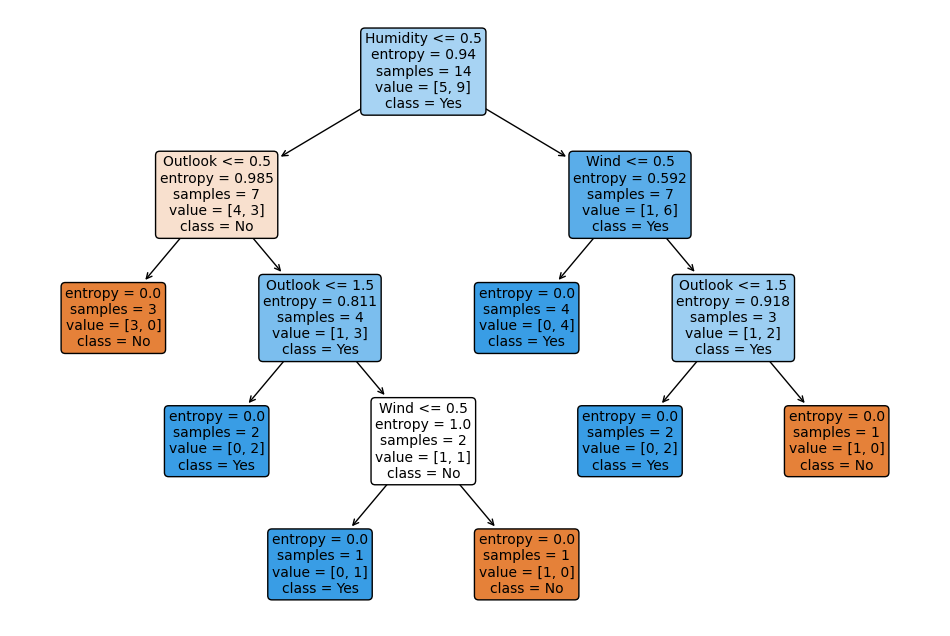

Prediction for {'Outlook': 'Sunny', 'Temperature': 'Cool', 'Humidity': 'High', 'Wind': 'Strong'}: No


C:\Users\rkmau\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [7]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Data Preparation
data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Overcast', 'Overcast', 'Rainy'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
    'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

df = pd.DataFrame(data)

# Convert categorical data to numeric using factorization
df_encoded = df.apply(lambda x: pd.factorize(x)[0])

# Separate features and target
X = df_encoded.drop('PlayTennis', axis=1)
y = df_encoded['PlayTennis']

# Build the Decision Tree using sklearn
clf = DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X, y)

# Plot the Decision Tree
plt.figure(figsize=(12,8))
tree.plot_tree(clf, 
               feature_names=df.columns[:-1].tolist(),  # Convert feature names to list
               class_names=['No', 'Yes'],  
               filled=True, 
               rounded=True,
               fontsize=10)
plt.show()

# A function to predict the outcome using the decision tree
def predict(query, clf, feature_names):
    query_encoded = [pd.factorize(df[feature])[0][df[feature] == query[feature]].tolist()[0] for feature in feature_names]
    prediction = clf.predict([query_encoded])
    return 'Yes' if prediction == 1 else 'No'

# Sample query
query = {'Outlook': 'Sunny', 'Temperature': 'Cool', 'Humidity': 'High', 'Wind': 'Strong'}
prediction = predict(query, clf, df.columns[:-1].tolist())
print(f"Prediction for {query}: {prediction}")


In [8]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define the data
data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Overcast', 'Overcast', 'Rainy'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
    'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Split the data into features (X) and target (y)
X = df.drop('PlayTennis', axis=1)
y = df['PlayTennis']

# Use OneHotEncoder to encode categorical features
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier
clf = DecisionTreeClassifier()

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Sample input data for prediction
sample_input = {
    'Outlook': ['Sunny'],
    'Temperature': ['Cool'],
    'Humidity': ['High'],
    'Wind': ['Weak']
}

# Encode the sample input using the same encoder
sample_input_encoded = encoder.transform(pd.DataFrame(sample_input))

# Make predictions for the sample input
sample_prediction = clf.predict(sample_input_encoded)

# Print the prediction
if sample_prediction[0] == 'No':
    print("Prediction: No, don't play tennis.")
else:
    print("Prediction: Yes, play tennis.")


Accuracy: 1.0
Prediction: No, don't play tennis.


C:\Users\rkmau\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
